In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [34]:
LData_url='D:/study/s7 files/UG Project Files/Project Code/Final_Year_Project/Data/final data/DATA_3.csv'
LData=pd.read_csv(LData_url)
LData.drop(['Unnamed: 0'],inplace=True,axis=1)

In [35]:
LData.head()

,Mean,Maximum_value,Minimum_value,Range,Standard Deviation,Variance,Absolute_mean,Absolute_MAX,RMS,Crest Factor,Shape factor,Impulse Factor,Kurtosis,Skewness,Clearance Factor,FAULT TYPE,Label,Label_no
0,0.011187,1.279438,-1.311982,2.591420,0.298905,0.089344,0.206043,1.311982,0.299114,4.386222,1.451708,6.367511,3.455019,-0.256605,8.113016,INNER RACE FAULT OF 0.007 INCH,IR_7_3,0
1,0.013728,1.349116,-1.371020,2.720136,0.269052,0.072389,0.189617,1.371020,0.269402,5.089124,1.420770,7.230475,3.765359,-0.177962,9.071524,INNER RACE FAULT OF 0.007 INCH,IR_7_3,0
2,0.012689,1.553767,-1.241053,2.794820,0.283981,0.080645,0.198589,1.553767,0.284264,5.465930,1.431419,7.824038,4.223392,-0.070134,9.823281,INNER RACE FAULT OF 0.007 INCH,IR_7_3,0
3,0.013143,1.348490,-1.202876,2.551366,0.273550,0.074830,0.189475,1.348490,0.273865,4.923914,1.445388,7.116969,4.028215,0.031575,8.946333,INNER RACE FAULT OF 0.007 INCH,IR_7_3,0
4,0.015546,1.299048,-1.366014,2.665062,0.281018,0.078971,0.197717,1.366014,0.281447,4.853532,1.423483,6.908922,4.118437,-0.093912,8.594890,INNER RACE FAULT OF 0.007 INCH,IR_7_3,0


In [36]:
LData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mean                2922 non-null   float64
 1   Maximum_value       2922 non-null   float64
 2   Minimum_value       2922 non-null   float64
 3   Range               2922 non-null   float64
 4   Standard Deviation  2922 non-null   float64
 5   Variance            2922 non-null   float64
 6   Absolute_mean       2922 non-null   float64
 7   Absolute_MAX        2922 non-null   float64
 8   RMS                 2922 non-null   float64
 9   Crest Factor        2922 non-null   float64
 10  Shape factor        2922 non-null   float64
 11  Impulse Factor      2922 non-null   float64
 12  Kurtosis            2922 non-null   float64
 13  Skewness            2922 non-null   float64
 14  Clearance Factor    2922 non-null   float64
 15  FAULT TYPE          2922 non-null   object 
 16  Label 

In [37]:
type(LData)

pandas.core.frame.DataFrame

In [38]:
Data_modified=LData
del Data_modified['Label']
del Data_modified['FAULT TYPE']
Data_modified

,Mean,Maximum_value,Minimum_value,Range,Standard Deviation,Variance,Absolute_mean,Absolute_MAX,RMS,Crest Factor,Shape factor,Impulse Factor,Kurtosis,Skewness,Clearance Factor,Label_no
0,0.011187,1.279438,-1.311982,2.591420,0.298905,0.089344,0.206043,1.311982,0.299114,4.386222,1.451708,6.367511,3.455019,-0.256605,8.113016,0
1,0.013728,1.349116,-1.371020,2.720136,0.269052,0.072389,0.189617,1.371020,0.269402,5.089124,1.420770,7.230475,3.765359,-0.177962,9.071524,0
2,0.012689,1.553767,-1.241053,2.794820,0.283981,0.080645,0.198589,1.553767,0.284264,5.465930,1.431419,7.824038,4.223392,-0.070134,9.823281,0
3,0.013143,1.348490,-1.202876,2.551366,0.273550,0.074830,0.189475,1.348490,0.273865,4.923914,1.445388,7.116969,4.028215,0.031575,8.946333,0
4,0.015546,1.299048,-1.366014,2.665062,0.281018,0.078971,0.197717,1.366014,0.281447,4.853532,1.423483,6.908922,4.118437,-0.093912,8.594890,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,0.014017,0.206112,-0.185876,0.391988,0.062031,0.003848,0.051067,0.206112,0.063595,3.241011,1.245316,4.036082,-0.066851,-0.152331,4.761452,9
2918,0.013751,0.216334,-0.214248,0.430582,0.066314,0.004398,0.054470,0.216334,0.067725,3.194307,1.243334,3.971592,-0.019693,-0.131660,4.656300,9
2919,0.015083,0.207155,-0.235110,0.442265,0.067297,0.004529,0.056020,0.235110,0.068967,3.409020,1.231121,4.196914,-0.091298,-0.275218,4.903307,9
2920,0.014486,0.187128,-0.230729,0.417857,0.061480,0.003780,0.050667,0.230729,0.063164,3.652878,1.246638,4.553818,-0.024136,-0.143131,5.378604,9


In [39]:
Data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mean                2922 non-null   float64
 1   Maximum_value       2922 non-null   float64
 2   Minimum_value       2922 non-null   float64
 3   Range               2922 non-null   float64
 4   Standard Deviation  2922 non-null   float64
 5   Variance            2922 non-null   float64
 6   Absolute_mean       2922 non-null   float64
 7   Absolute_MAX        2922 non-null   float64
 8   RMS                 2922 non-null   float64
 9   Crest Factor        2922 non-null   float64
 10  Shape factor        2922 non-null   float64
 11  Impulse Factor      2922 non-null   float64
 12  Kurtosis            2922 non-null   float64
 13  Skewness            2922 non-null   float64
 14  Clearance Factor    2922 non-null   float64
 15  Label_no            2922 non-null   int64  
dtypes: flo

In [40]:
scaler=StandardScaler()
scaler.fit(Data_modified.drop('Label_no',axis=1))
scaled_features=scaler.transform(Data_modified.drop('Label_no',axis=1))
scaled_features

array([[-0.20546044, -0.13969171,  0.09951844, ...,  0.20563097,
        -1.18352138,  0.07620918],
       [ 0.18292767, -0.09169373,  0.05892247, ...,  0.28530258,
        -0.77217435,  0.30517026],
       [ 0.02411318,  0.04928239,  0.14829098, ...,  0.40289053,
        -0.20816859,  0.484744  ],
       ...,
       [ 0.39000423, -0.87834333,  0.84000042, ..., -0.70479206,
        -1.28087901, -0.69050104],
       [ 0.29878055, -0.89213916,  0.84301284, ..., -0.68755009,
        -0.5899856 , -0.57696581],
       [ 0.62738965, -0.86727793,  0.85348459, ..., -0.68567747,
        -0.12181454, -0.75439933]])

In [41]:
scaled_df=pd.DataFrame(scaled_features,columns=Data_modified.columns[:-1])
scaled_df.head()

,Mean,Maximum_value,Minimum_value,Range,Standard Deviation,Variance,Absolute_mean,Absolute_MAX,RMS,Crest Factor,Shape factor,Impulse Factor,Kurtosis,Skewness,Clearance Factor
0,-0.205460,-0.139692,0.099518,-0.119825,-0.117697,-0.318184,-0.107373,-0.142322,-0.118787,0.204657,0.244874,0.130412,0.205631,-1.183521,0.076209
1,0.182928,-0.091694,0.058922,-0.075443,-0.224402,-0.372656,-0.205950,-0.102628,-0.225074,0.830043,0.094691,0.461132,0.285303,-0.772174,0.305170
2,0.024113,0.049282,0.148291,-0.049692,-0.171042,-0.346132,-0.152107,0.020242,-0.171910,1.165295,0.146387,0.688608,0.402891,-0.208169,0.484744
3,0.093537,-0.092125,0.174542,-0.133636,-0.208325,-0.364816,-0.206800,-0.117776,-0.209108,0.683052,0.214199,0.417632,0.352784,0.323827,0.275266
4,0.460803,-0.126183,0.062365,-0.094433,-0.181633,-0.351511,-0.157338,-0.105994,-0.181986,0.620432,0.107863,0.337901,0.375946,-0.332541,0.191315


In [42]:
X=scaled_df
Y=Data_modified['Label_no']

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=750,stratify = Data_modified['Label_no'], random_state=132)

In [44]:
LogModel=LogisticRegression()

In [45]:
LogModel.fit(X_train,Y_train)

C:\Users\chari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
predictions=LogModel.predict(X_test)
training_predictions=LogModel.predict(X_train)


In [47]:
fault_type = ['IR_7_1','IR_14_1','IR_21_1','BL_7_1','BL_14_1','BL_21_1','OR_7_1','OR_14_1','OR_21_1','NORMAL']
print(classification_report(Y_test,predictions,target_names=fault_type))



              precision    recall  f1-score   support

      IR_7_1       0.95      0.97      0.96        75
     IR_14_1       0.94      0.81      0.87        75
     IR_21_1       0.94      1.00      0.97        75
      BL_7_1       0.99      1.00      0.99        75
     BL_14_1       0.64      0.65      0.65        75
     BL_21_1       0.96      0.91      0.93        75
      OR_7_1       0.68      0.83      0.75        75
     OR_14_1       0.71      0.73      0.72        75
     OR_21_1       0.95      0.72      0.82        75
      NORMAL       0.94      1.00      0.97        75

    accuracy                           0.86       750
   macro avg       0.87      0.86      0.86       750
weighted avg       0.87      0.86      0.86       750



In [48]:
test_confusion_matrix=confusion_matrix(Y_test,predictions)
train_confusion_matrix=confusion_matrix(Y_train,training_predictions)

Text(140.09375, 0.5, 'True')

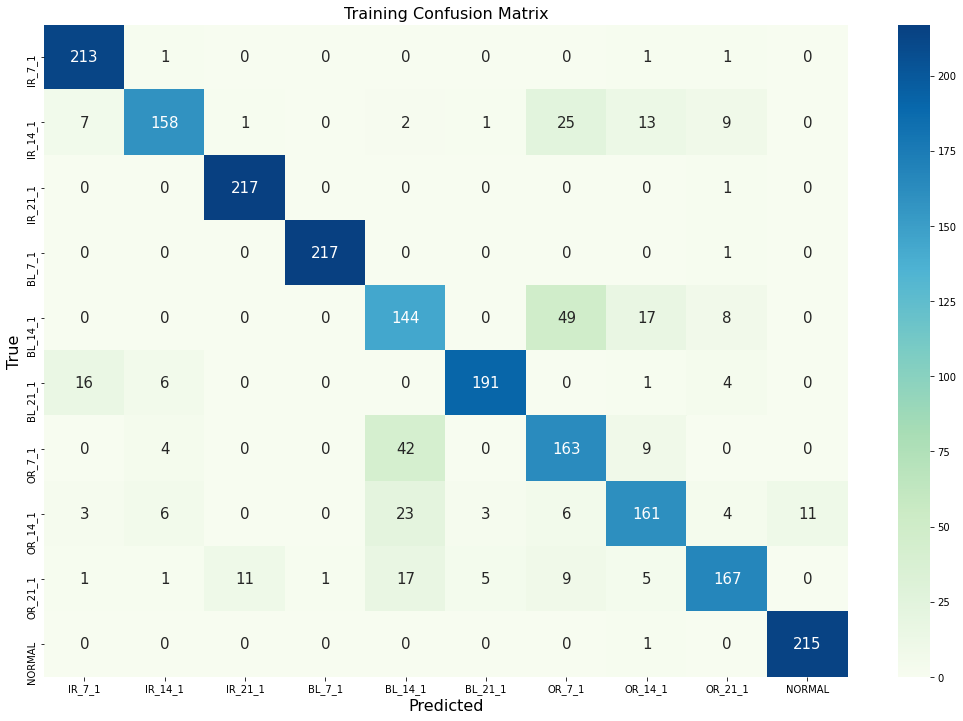

In [49]:
plt.figure(1,figsize=(18,12))
sns.heatmap(train_confusion_matrix, annot= True,cmap='GnBu',xticklabels=fault_type,yticklabels=fault_type,fmt='d',annot_kws={"size":15})
plt.title('Training Confusion Matrix',fontsize = 16)
plt.xlabel('Predicted',fontsize = 16)
plt.ylabel('True',fontsize = 16)

Text(140.09375, 0.5, 'True')

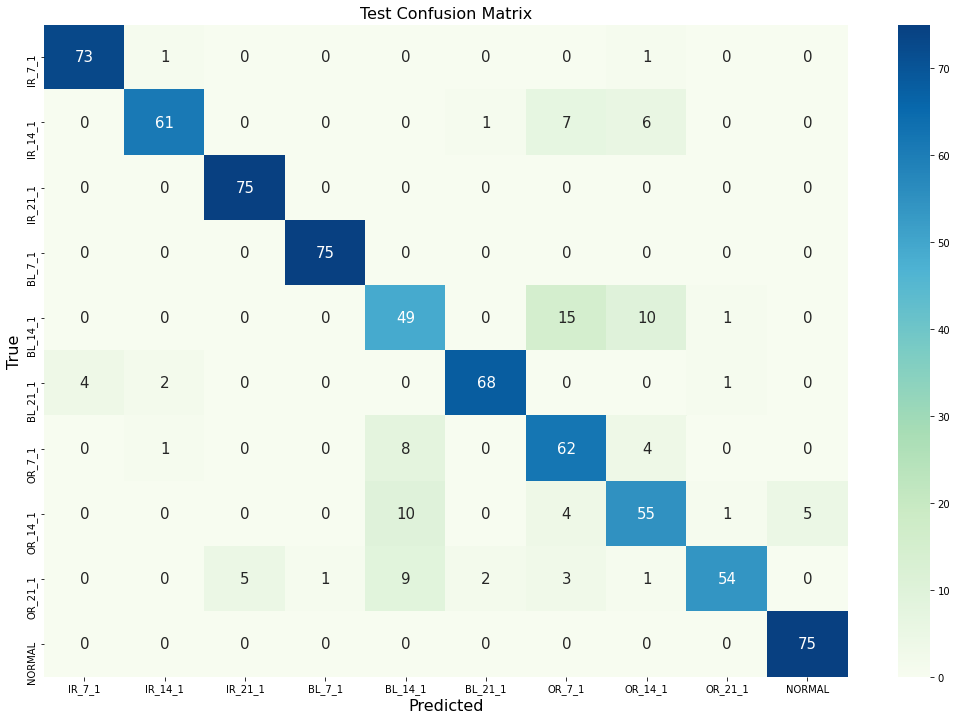

In [50]:
plt.figure(1,figsize=(18,12))
sns.heatmap(test_confusion_matrix,annot=True,cmap='GnBu',xticklabels=fault_type,yticklabels=fault_type,fmt='d',annot_kws={"size":15})
plt.title('Test Confusion Matrix',fontsize = 16)
plt.xlabel('Predicted',fontsize = 16)
plt.ylabel('True',fontsize = 16)

Text(140.09375, 0.5, 'True')

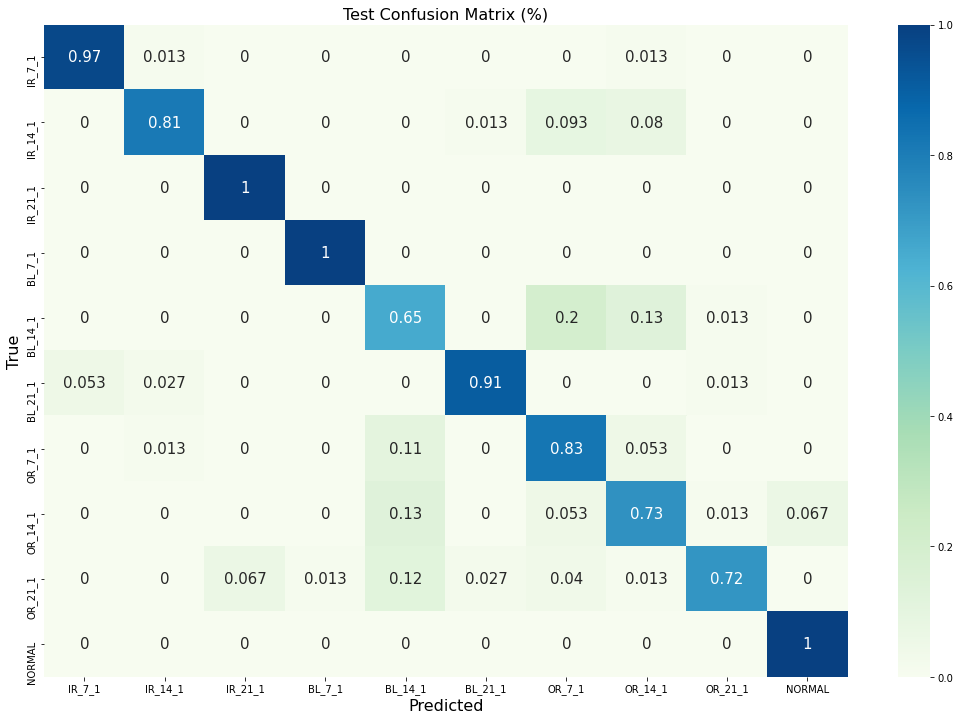

In [51]:
plt.figure(3,figsize=(18,12))
sns.heatmap(test_confusion_matrix/75, annot = True,cmap='GnBu',xticklabels=fault_type,yticklabels=fault_type,annot_kws={"size":15})
plt.title('Test Confusion Matrix (%)',fontsize = 16)
plt.xlabel('Predicted',fontsize = 16)
plt.ylabel('True',fontsize = 16)